In [1]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np, matplotlib.pyplot as plt

## e-Funktion

(Zins und Zinseszins)

In [2]:
# side-note: darstellung von zahlen mit der 'e'-Notation
print(5 * 10 ** 2)
print(5e2) # bedeutet: 5 * 10 ** 2

500
500.0


Stellen wir uns vor, wir haben 1000€ auf einem Sparkonto, das nach einem Jahr 10% Zinsen auszahlt: $$z = s + s \cdot x$$, wenn $s$ der Startbetrag, $x$ der Zinssatz und $z$ der Endbetrag nach einem Jahr ist.

In [3]:
x = 0.1 # zinssatz
s = 1000 # start-betrag

z = s + s * x # betrag nach einem jahr
z

1100.0

Tatsächlich können wir die Formel $$z = s + s \cdot x$$ noch vereinfachen, indem wir das Distributiv-Gesetz anwenden und $s$ ausklammern: $$z = s + s \cdot x = s \cdot (1 + x)$$. Also erhalten wir die Formel: $$z = s (1 + x)$$

In [4]:
x = 0.1
s = 1000

z = s * (1 + x)
z

1100.0

**Überlegung**:

Was passiert, wenn wir 2x pro Jahr die Hälfte des ursprünglichen Zinssatzes auszahlen, aber mit Zinseszins?

In [5]:
x = 0.1
s = 1000

z = s * (1 + x / 2)
print(z)
z = z * (1 + x / 2)
print(z)

1050.0
1102.5


Wir wenden also die Formel zweimal an (aber beim zweiten Mal nicht auf den Startbetrag, sondern auf den vorherigen Endbetrag): $$z_1 = s (1 + \frac{x}{2})$$ und $$z_2 = z_1 (1 + \frac{x}{2})$$.

Wenn wir $z_1$ in die zweite Formel einsetzen: $$\begin{align}z_2 = z_1 \cdot (1 + \frac{x}{2})& = \\ s \cdot (1 + \frac{x}{2}) \cdot (1 + \frac{x}{2})& = \\ s \cdot (1 + \frac{x}{2})^2 & \end{align}$$

In [6]:
x = 0.1
s = 1000

z = s * (1 + x / 2) ** 2
print(z)

1102.5


Das können wir noch verallgemeinern, wenn wir sagen, dass wir $n$ Mal im Jahr den Zinssatz geteilt durch $n$ mit Zinseszins auszahlen: $$z = s \cdot (1 + \frac{x}{n})^n$$

In [7]:
x = 0.1
n = 4 # was passiert, wenn wir n sehr hoch setzen?
s = 1000

z = s * (1 + x / n) ** n
print(z)

1103.8128906249995


Wenn wir nun (weggehend von der Vorstellung einer Zinseszins-Auszahlung) den Startbetrag $s$ auf $1$ setzen, erhalten wir interessanterweise die als Annäherung der Exponentialfunktion mit Basis $e$ (der Eulerschen Zahl), je höher wir $n$ festlegen: $$\begin{align}z = s \cdot (1 + \frac{x}{n})^n& = \\ 1 \cdot (1 + \frac{x}{n})^n& = \\ (1 + \frac{x}{n})^n& \end{align}$$. Also: $$e^x := \exp(x) = \lim_{n \to \infty} (1 + \frac{x}{n})^n$$

In [8]:
x = 1
n = 10e10

z = (1 + x/n) ** n
print(z)

2.71828205335711


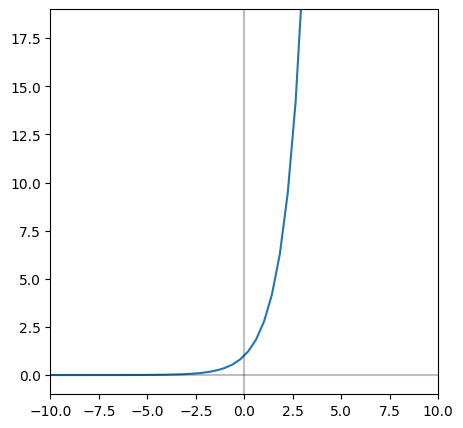

In [9]:
x = np.linspace(-10, 10)
n = 10e10
z = (1 + x/n) ** n

plt.figure(figsize=(5, 5))
plt.plot(x, z)
plt.plot([-10, 10], [0, 0], c=[0, 0, 0, 0.25])
plt.plot([0, 0], [-1, 19], c=[0, 0, 0, 0.25])
plt.xlim(-10, 10)
plt.ylim(-1, 19)
plt.show()

In [10]:
def own_exp(x, n=10e10):

    return (1 + x/n) ** n

print(f'exp(1):\t\t{own_exp( 1 )}')
print(f'exp(2):\t\t{own_exp( 2 )}')

print(f'exp(ln(1)):\t{own_exp( np.log(1) )}')

print(f'exp(ln(2) * x):\t{own_exp( np.log(2) * 4 )}')

exp(1):		2.71828205335711
exp(2):		7.389057321529456
exp(ln(1)):	1.0
exp(ln(2) * x):	15.99989506560296


## Eulersche Identität

$$e^{\pi i} = -1$$

$$e^{\pi i} + 1 = 0$$

In [11]:
# hier wird also 'pi * i' als argument in die funktion eingesetzt.
# mit unserer formel können wir die annäherung sogar animiert plotten:

fig, ax = plt.subplots(figsize=(5, 5))

def plot_exp(n):

    ax.clear()
    x = np.pi * 1j

    for i in range(n):
        z = (1 + x/n) ** i
        ax.plot([0, z.real], [0, z.imag], color='blue')

    ax.plot([-3, 3], [0, 0], c=[0, 0, 0, 0.5])
    ax.plot([0, 0], [-3, 3], c=[0, 0, 0, 0.5])
    ax.grid()
    ax.set_title(f'n = {n}')

anim = FuncAnimation(fig, plot_exp, frames=100, interval=200)
html_video = HTML(anim.to_html5_video())
plt.close(fig)
display(html_video)

## Eulersche Formel

$$e^{t \cdot 2 \pi i} = \cos(t \cdot 2 \pi) + \sin(t \cdot 2 \pi) \cdot i$$

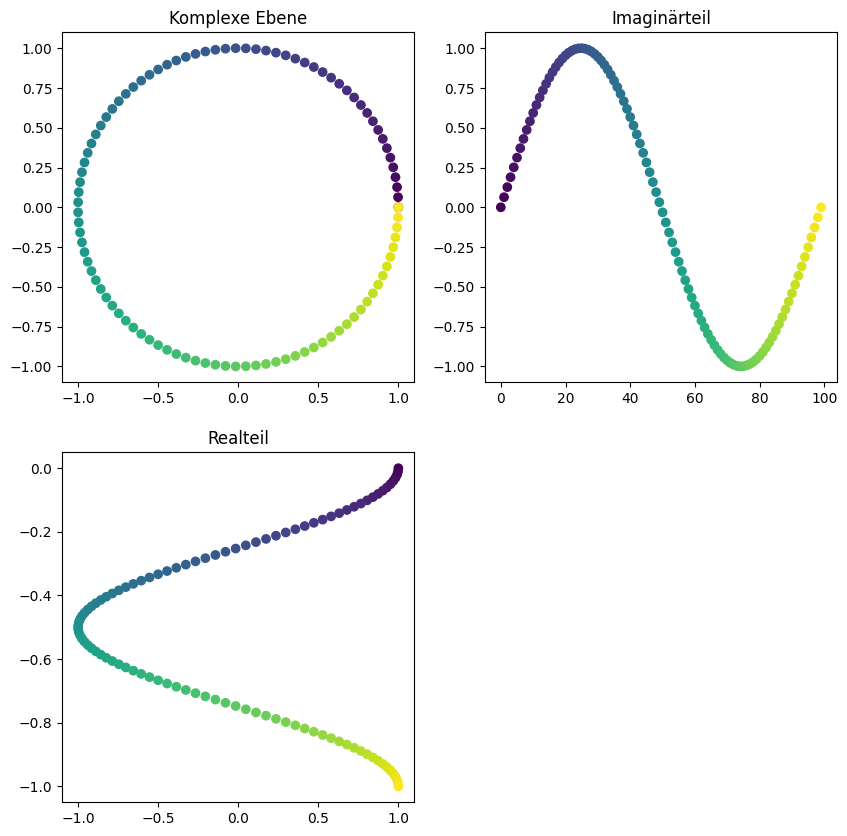

In [12]:
import matplotlib.cm as cm

t = np.linspace(0, 1, 100)
z = np.exp(2 * np.pi * 1j * t)

cmap = cm.viridis

plt.figure(figsize=(5 * 2, 5 * 2))

plt.subplot(2, 2, 1)
colors = cmap(t / np.max(t))
plt.scatter(z.real, z.imag, color=colors)
plt.title('Komplexe Ebene')

plt.subplot(2, 2, 2)
plt.scatter(range(len(z.imag)), z.imag, color=colors)
plt.title('Imaginärteil')

plt.subplot(2, 2, 3)
plt.scatter(z.real, -t, color=colors)
plt.title('Realteil')

plt.show()